# Arbres

## Principe

La structure d'arbre étend le concept de liste en admettant plusieurs éléments suivants plutôt qu'un seul. 

Cela s'accompagne d'un changement de vocabulaire

* le premier élément s'appelle la **racine** et pas la tête.


* les éléments suivants un élément s'appellent les **enfants**


* l'élément précédent s'appelle le **parent**

Les élément sont stockés dans des structures appelées **noeuds**. 

In [1]:
class Noeud:
    def __init__(self,valeur):
        self.etiquette = valeur
        self.enfants = []
        
    def ajouter_enfant(self,valeur):
        self.enfants.append(Noeud(valeur))
        return self.enfants[len(self.enfants)-1]
    
    def __str__(self): 
        return "{}".format(self.etiquette)

Construisons manuellement un tel arbre

In [2]:
racine = Noeud('A')
b = racine.ajouter_enfant('B')
c = racine.ajouter_enfant('C')
d = racine.ajouter_enfant('D')
e = racine.ajouter_enfant('E')
f = b.ajouter_enfant('F')
g = b.ajouter_enfant('G')
h = d.ajouter_enfant('H')
i = e.ajouter_enfant('I')
j = e.ajouter_enfant('J')
k = e.ajouter_enfant('K')

Affichons cet arbre avec la racine `A` à gauche

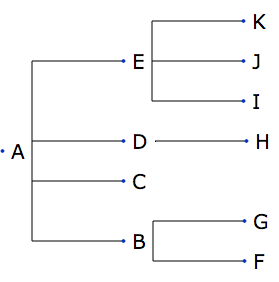

In [3]:
import include.helpers as h
h.afficher_arbre(racine)

## Parcours en profondeur 

Il est indispensable de pouvoir atteindre une et une seule fois tous les éléments d'un arbre. Pour cela, la méthode la plus simple est le parcours en profondeur. 

Il correspond à l'ordre de succession au trône dans la plupart des monarchies européennes: la **primogéniture**, i.e.   

* d'abord l'enfant ainé, 
* puis toute sa descendance par ordre de primogéniture,
* avant de passer à l'enfant puîné, 
* puis toute sa descendance par ordre de primogéniture,
* ... 
* jusqu'à l'enfant cadet, 
* puis toute sa descendance par ordre de primogéniture.

Il se définit récursivement

In [4]:
def parcoursEnProfondeur(R,action):
    if R: 
        action(R)
        for r in R.enfants:
            parcoursEnProfondeur(r,action)

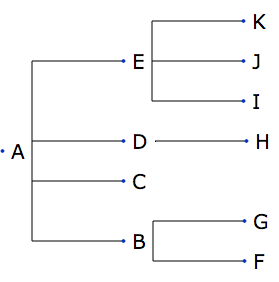

In [5]:
h.afficher_arbre(racine)

# Effectuez le parcours en profondeur de cet arbre

In [6]:
def afficher(R): print(R, end=" ")
parcoursEnProfondeur(racine, afficher)

A B F G C D H E I J K 

Notons qu'il s'agit là d'un parcours pré-ordonné: l'action sur la racine s'effectue avant l'action sur ses enfants. On peut aussi définir un parcours post-ordonné

In [7]:
def parcoursPostOrdonne(R,action):
    if R:
        for r in R.enfants:
            parcoursPostOrdonne(r,action)
        action(R)

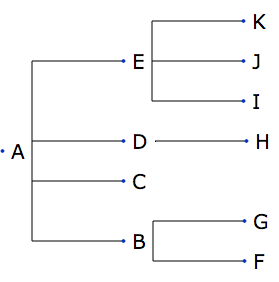

In [8]:
h.afficher_arbre(racine)

# Parcourez l'arbre en profondeur et listez les noeuds en post-ordre 

In [9]:
parcoursPostOrdonne(racine, afficher)

F G B C H D I J K E A 

## Représentations linéaires d'un arbre

L'affichage indenté effectue un parcours en profondeur tout en notant la profondeur de récursion. 

Il affiche un noeud par ligne, décalé de cette profondeur

In [10]:
def affichage_indente(R,profondeur):
    if R:
        print(" "*profondeur*3,R)
        for r in R.enfants:
            affichage_indente(r,profondeur+1)

In [11]:
affichage_indente(racine,0)

 A
    B
       F
       G
    C
    D
       H
    E
       I
       J
       K


L'affichage sous forme de liste imbriquée utilise 

* les parenthèses pour entourer les enfants d'un noeud
* les virgules pour séparer les frères

In [12]:
def affichage_listes_imbriquees(R):
    if R:
        print(R,end="")
        if len(R.enfants) > 0:
            print("(",end="")
            for i,r in enumerate(R.enfants):
                if i > 0: print(",",end="")
                affichage_listes_imbriquees(r)
            print(")",end ="")

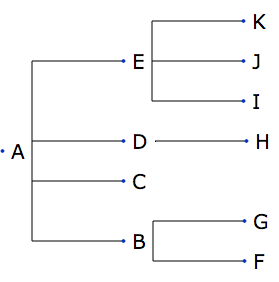

In [13]:
h.afficher_arbre(racine)

# Représentez cet arbre sous forme de listes imbriquées

In [14]:
affichage_listes_imbriquees(racine)

A(B(F,G),C,D(H),E(I,J,K))

## Parcours en largeur

Le parcours en largeur correspond lui à l'ordre de succession **adelphique**, comme par exemple pour le trône d'Arabie Saoudite. 

* d'abord tous les frères 
* ensuite la génération suivante

In [15]:
from queue import Queue

def parcoursEnLargeur(R):
    Q = Queue()
    Q.put(R)             
    while not Q.empty():
        n = Q.get()             
        print(n, end=" ")
        for c in n.enfants:
            Q.put(c)    

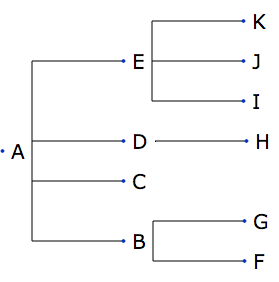

In [16]:
h.afficher_arbre(racine)

# Effectuez le parcours en largeur de cet arbre 

In [17]:
parcoursEnLargeur(racine)

A B C D E F G H I J K 

### Degré

Degré d'un noeud `:=` nombre de ses enfants

In [18]:
def degreNoeud(R):
    if R: return len(R.enfants)
    else: return 0

Degré d'un arbre `:=` degré maximum de ses noeuds

In [19]:
def degreArbre(R):
    d = degreNoeud(R)
    if R: 
        for c in R.enfants:
            d = max(d,degreArbre(c))
    return d

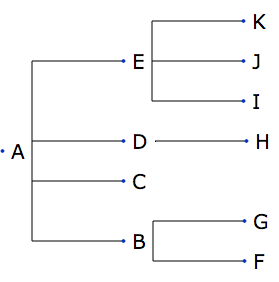

In [20]:
h.afficher_arbre(racine)

# Quel est le degré de cet arbre ?

In [21]:
degreArbre(racine)

4

### Feuilles 

noeuds n'ayant pas d'enfants

In [22]:
def feuilles(R):
    if R:
        if len(R.enfants) == 0: print(R, end=" ")
        for c in R.enfants:
            feuilles(c)

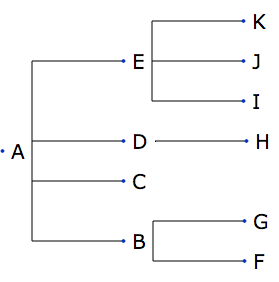

In [23]:
h.afficher_arbre(racine)

# Quelles sont les feuilles de cet arbre ? 

In [24]:
feuilles(racine)

F G C H I J K 

### Noeuds internes 

noeuds ayant des enfants 

In [25]:
def noeuds_internes(R):
    if R:
        if len(R.enfants) != 0: print(R, end=" ")
        for c in R.enfants:
            noeuds_internes(c)

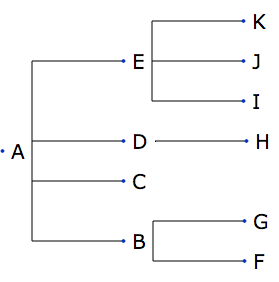

In [26]:
h.afficher_arbre(racine)

# Quels sont les noeuds internes de cet arbre ?

In [27]:
noeuds_internes(racine)

A B D E 

### Ancêtres d'un noeud

noeud parent et ses ancêtres jusqu'à la racine qui n'a pas de parent. 

In [28]:
def ancetres(R,val):
    if R:
        if R.etiquette == val:
            return True
        else:
            for e in R.enfants:
                if(ancetres(e,val)):
                    print(R, end=" ")
                    return True
    return False

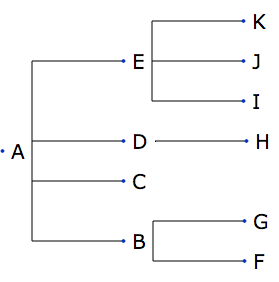

In [29]:
h.afficher_arbre(racine)

# Quels sont les ancêtre de J

In [30]:
ancetres(racine,'J')

E A 

True

In [31]:
ancetres(racine,'Z')

False

### Hauteur d'un arbre 

plus grand nombre de noeuds sur le chemin allant d'une feuille à la racine

* la hauteur d'un arbre vide est 0
* celle d'une feuille est 1
* celle d'un noeud interne est de 1 plus le maximum des hauteurs de ses enfants

In [32]:
def hauteur(R):
    if R:
        h = 1
        for c in R.enfants:
            h = max(h,hauteur(c)+1)
        return h
    else:
        return 0

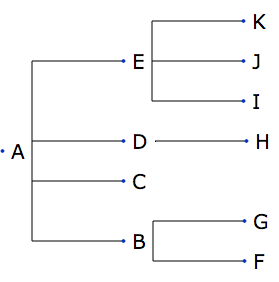

In [33]:
h.afficher_arbre(racine)

# Quelle est la hauteur de cet arbre ? 

In [34]:
hauteur(racine)

3

### Taille 

nombre de noeuds de l'arbre 
    
* la taille d'un arbre vide est 0
* la taille d'une feuille est 1
* la taille du sous-arbre d'un noeud interne est la somme des tailles de ses enfants, plus 1. 

In [35]:
def taille(R):
    if R:
        t = 1
        for c in R.enfants:
            t += taille(c)
        return t
    else:
        return 0

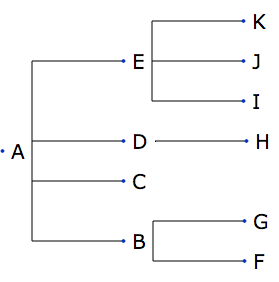

In [36]:
h.afficher_arbre(racine)

# Quelle est la taille de cette arbre ?

In [37]:
taille(racine)

11

<table style="width: 100%; border: 0px">
<tr style="background-color:white; border:0px">
<td style="width: 120px; border: 0px">
    <img src="https://heig-vd.ch/ResourcePackages/WhiteFox/assets/images/logo-heig-vd.svg" height=200px align=left >
    </td>
    <td style="vertical-align: middle; border: 0px" height=200px>
    <p style="text-align: left">
        <a href="https://ocuisenaire.github.io/ASD1-notebooks/">ASD1 Notebooks on GitHub.io</a>
 </p>        
<p style="text-align: left">
© Olivier Cuisenaire, 2018 </p>
</td>
</tr>
</table>